In [1]:
%pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
train_df = pd.read_csv('train.csv')
x_test = pd.read_csv('test.csv')
y_test_df = pd.read_csv('gender_submission.csv')
y_test    = y_test_df['Survived']         # <-- make this a 1-D Series
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print(train_df.duplicated().sum())

0


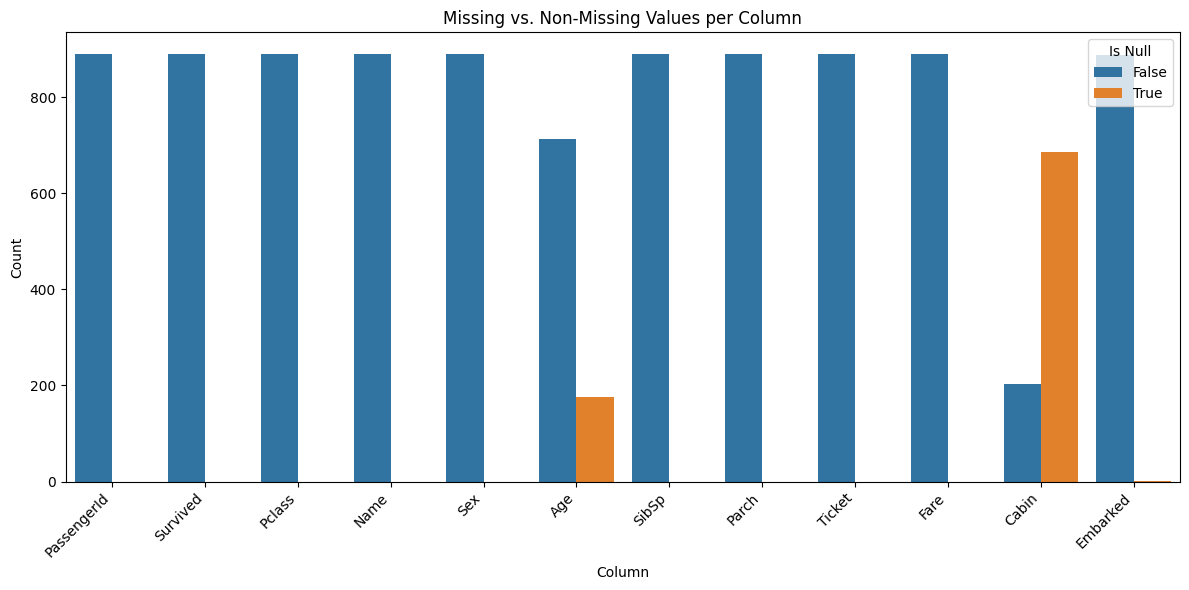

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

null_df = train_df.isnull().reset_index().melt(
    id_vars='index',
    var_name='column',
    value_name='is_null'
)

plt.figure(figsize=(12, 6))
sns.countplot(
    data=null_df,
    x='column',
    hue='is_null'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Column')
plt.ylabel('Count')
plt.title('Missing vs. Non-Missing Values per Column')
plt.legend(title='Is Null')
plt.tight_layout()
plt.show()


In [7]:
train_df.drop(columns=['Cabin'], inplace=True)

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# 1) Simple global median
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# 2) Grouped by Pclass & Sex
group_median = train_df.groupby(['Pclass','Sex'])['Age'].median()
train_df['Age'] = train_df.apply(
    lambda r: group_median.loc[r['Pclass'], r['Sex']] 
              if pd.isna(r['Age']) 
              else r['Age'],
    axis=1
)


In [10]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
train_df.dropna(subset=['Embarked'], inplace=True)

In [12]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

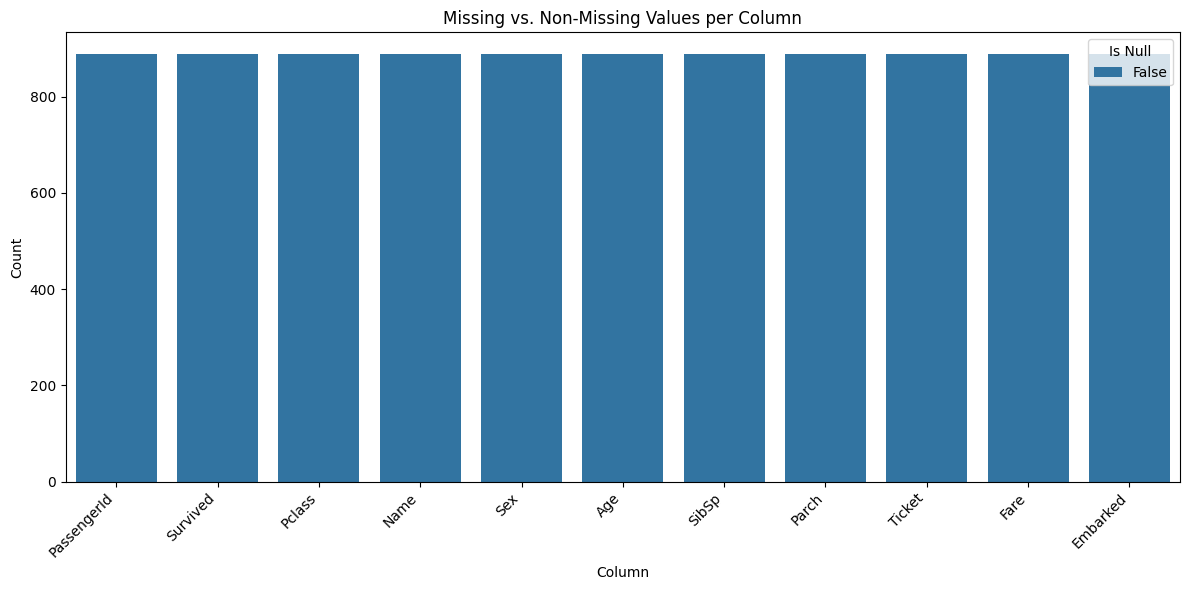

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

null_df = train_df.isnull().reset_index().melt(
    id_vars='index',
    var_name='column',
    value_name='is_null'
)

plt.figure(figsize=(12, 6))
sns.countplot(
    data=null_df,
    x='column',
    hue='is_null'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Column')
plt.ylabel('Count')
plt.title('Missing vs. Non-Missing Values per Column')
plt.legend(title='Is Null')
plt.tight_layout()
plt.show()


In [14]:
train_df.drop(columns=['PassengerId','Name'], inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

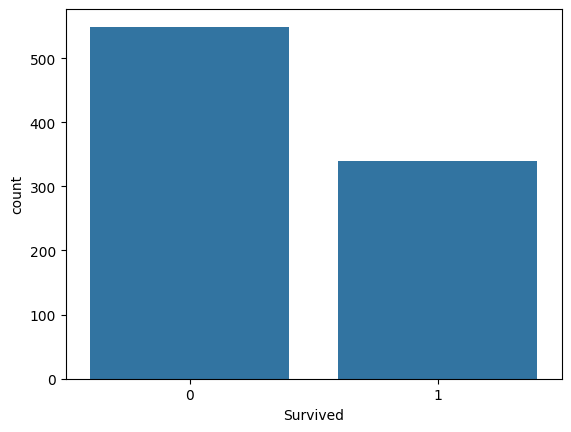

In [15]:
sns.countplot( x = 'Survived', data = train_df)

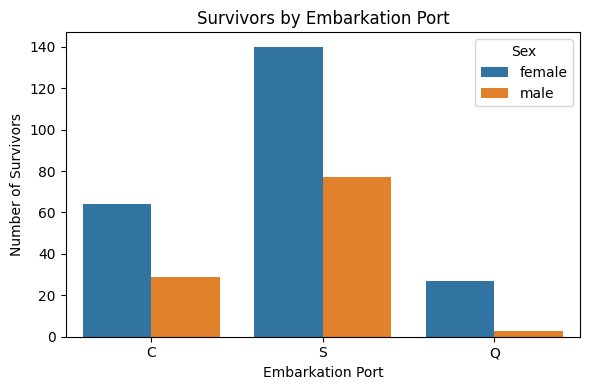

In [16]:
plt.figure(figsize=(6,4))

# Option A: countplot on the filtered DataFrame
sns.countplot(data=train_df[train_df['Survived'] == 1], x='Embarked', hue = 'Sex')

plt.ylabel('Number of Survivors')
plt.xlabel('Embarkation Port')
plt.title('Survivors by Embarkation Port')
plt.tight_layout()
plt.show()


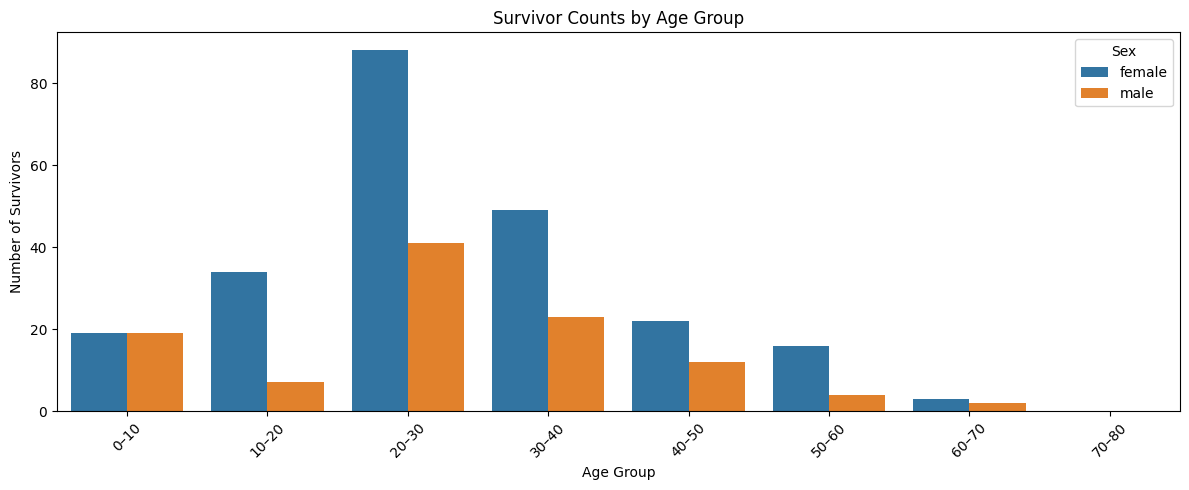

In [17]:
max_age = int(train_df['Age'].max())           # e.g. 80
bin_width = 10
bins = list(range(0, max_age + bin_width, bin_width))
labels = [f"{i}–{i+bin_width}" for i in bins[:-1]]

# 3) Create age groups
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

# 4) Filter to survivors
surv = train_df[train_df['Survived'] == 1]

# 5) Plot with Seaborn
plt.figure(figsize=(12, 5))
sns.countplot(data = surv, x = 'AgeGroup', order = labels, hue = 'Sex')
plt.xlabel('Age Group')
plt.ylabel('Number of Survivors')
plt.title('Survivor Counts by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
print(train_df['Age'].max())

80.0


In [19]:
train_df.drop(columns=['AgeGroup'], inplace=True)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [21]:
x_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
x_test.drop(columns=['Cabin'], inplace=True)

# 1) Simple global median
x_test['Age'] = x_test['Age'].fillna(x_test['Age'].median())

# 2) Grouped by Pclass & Sex
group_median = x_test.groupby(['Pclass','Sex'])['Age'].median()
x_test['Age'] = x_test.apply(
    lambda r: group_median.loc[r['Pclass'], r['Sex']] 
              if pd.isna(r['Age']) 
              else r['Age'],
    axis=1
)

x_test.drop(columns=['PassengerId','Name'], inplace=True)


In [23]:
# inside your preprocess(), before encoding:
x_test['Fare'] = x_test['Fare'].fillna(x_test['Fare'].median())


In [24]:
x_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


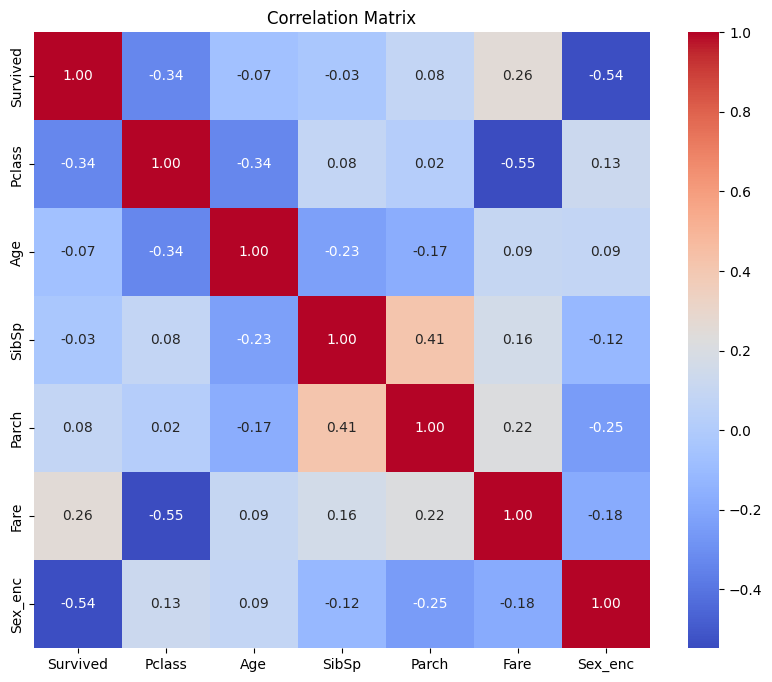

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
le.fit(train_df['Sex'])
train_df['Sex_enc'] = le.transform(train_df['Sex'])

# Only select numeric columns for correlation
corr_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_enc']
corr_matrix = train_df[corr_cols].corr()
import seaborn as sns

# ... your LabelEncoder / corr_matrix code here ...

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,        # put the correlation values on the heatmap
    fmt=".2f",         # format numbers to two decimals
    cmap="coolwarm",   # color palette (feel free to change)
    square=True
)
plt.title("Correlation Matrix")
plt.show()


Test accuracy: 0.9784688995215312
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       266
           1       0.96      0.99      0.97       152

    accuracy                           0.98       418
   macro avg       0.97      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418

Test-set accuracy: 0.9785

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       266
           1       0.96      0.99      0.97       152

    accuracy                           0.98       418
   macro avg       0.97      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



C:\Users\pc\AppData\Local\Temp\ipykernel_23936\446326711.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'] = scaler.fit_transform(X[['Fare']]).ravel()
C:\Users\pc\AppData\Local\Temp\ipykernel_23936\446326711.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'] = scaler.transform(X[['Fare']]).ravel()


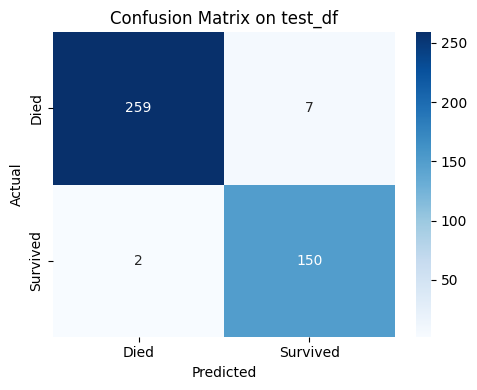

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def preprocess(df, scaler=None, fit_scaler=False):
    df = df.copy()
    
    # 1) Fill any missing Ages / Embarked
    df['Age'] = df['Age'].fillna(train_df['Age'].median())
    df['Embarked'] = df['Embarked'].fillna(train_df['Embarked'].mode()[0])
    
    # 2) Encode Sex (fit on train_df only)
    le = LabelEncoder()
    le.fit(train_df['Sex'])
    df['Sex_enc'] = le.transform(df['Sex'])
    
    # 3) One-hot Embarked (ensure same dummy columns on test)
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
    for col in ['Embarked_Q', 'Embarked_S']:
        if col not in df:
            df[col] = 0
    
    # 4) Select features
    features = ['Pclass', 'Parch', 'Fare', 'Sex_enc', 'Embarked_Q', 'Embarked_S']
    X = df[features]
    
    # 5) Scale “Fare” properly as a 2-D input
    if scaler is None:
        scaler = StandardScaler()
        fit_scaler = True
    if fit_scaler:
        X['Fare'] = scaler.fit_transform(X[['Fare']]).ravel()
    else:
        X['Fare'] = scaler.transform(X[['Fare']]).ravel()
    
    return X, scaler


# 2) Prepare train and test
X_train, scaler = preprocess(train_df, scaler=None, fit_scaler=True)
y_train = train_df['Survived']

# 3) Fit logistic regression on train
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

# 4) Predict & evaluate on test_df
X_test, _ = preprocess(x_test, scaler=scaler, fit_scaler=False)

# 3) Predict
y_pred = logreg.predict(X_test)

# 4) Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Test-set accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print(classification_report(y_test, y_pred))

# 5) Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Died','Survived'],
            yticklabels=['Died','Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on test_df')
plt.tight_layout()
plt.show()


In [28]:
print(X_test.isnull().sum())


Pclass        0
Parch         0
Fare          0
Sex_enc       0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [29]:
import pickle

# 1. Save the logistic regression model
with open('logreg_model.pkl', 'wb') as f:
    pickle.dump(logreg, f)

# 2. Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
